**VPC - TP3: detección de círculos**

En el presente TP se busca aplicar la transformada de Hough para encontrar círculos en imágenes. El ensayo se hará sobre imágenes que contienen distintos pares de ojos donde se buscará encontrar todas las iris al mismo tiempo por un lado y todas las pupilas por otro lado.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
####### Se incorporan las librerías necesarias.
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
from google.colab.patches import cv2_imshow

In [3]:
####### Se define la función para cargar las imágenes, similar al TP1/2.
def carga_imagen(img):
    imagen = cv2.imread('/content/drive/MyDrive/CV I/Imágenes TPs/TP3/' + img)
  #  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    return imagen

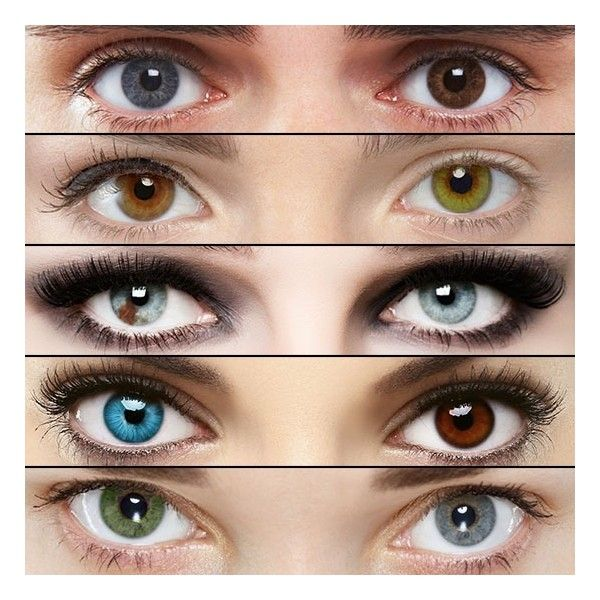

In [7]:
######## Carga de imagen.
img = carga_imagen('eyes.jpg')
cv2_imshow(img)

In [8]:
######### La función busca_circulos es la que aplica Hough como fue dado en clase. Los parámetros quedan para que el usuario los pueda poner al llamar a la función.
######### Los círculos detectados se pintan de verde, con su centro en rojo.
######## Antes de usar Hough, se utiliza un filtro de mediana para mejorar los resultados.
####### A su vez, se le pasa una imagen en escala de grises puesto que asi lo indica la documentación de OpenCV.
def busca_circulos(img, minDist, param1, param2, minRadius, maxRadius):
    img_out = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray,5)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1,minDist=minDist,param1=param1,param2=param2,minRadius=minRadius,maxRadius=maxRadius)
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(img_out, (i[0],i[1]), i[2], (0,255,0),2)
        cv2.circle(img_out, (i[0],i[1]), 2, (0,0,255),3)
    
    return img_out

**Detección de Iris**

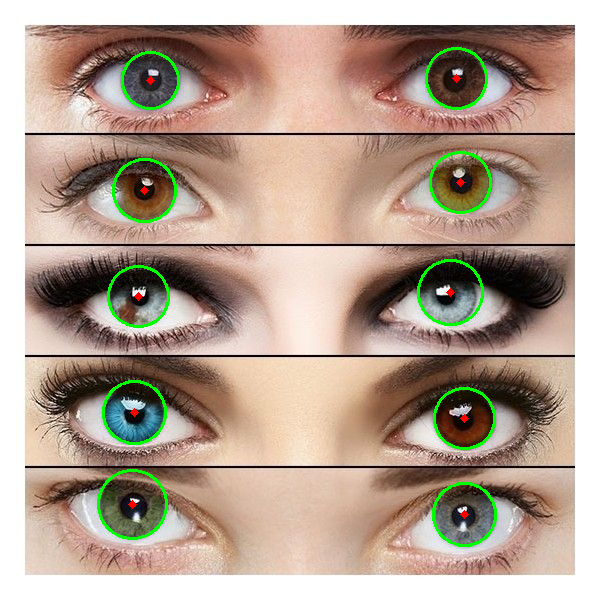

In [23]:
####### se prueban distintos parámetros hasta obtener todas las iris. El radio ha quedado determinado entre 25 y 43. 
minDist=15
param1=120
param2=27
minRadius=25
maxRadius=43
img_out = busca_circulos(img, minDist, param1, param2, minRadius, maxRadius)
cv2_imshow(img_out)

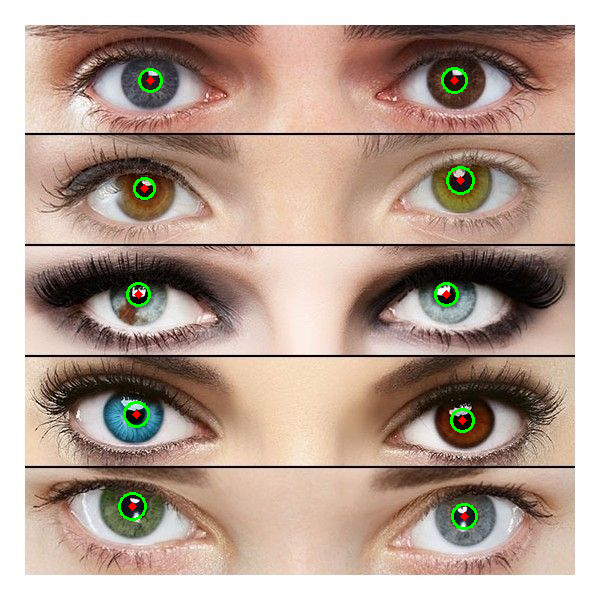

In [48]:
####### se prueban distintos parámetros hasta obtener todas las pupilas. El radio ha quedado determinado entre 10 y 14, un rango más acotado que en el item anterior.
####### en este caso se probaron diversas combinaciones de parámetros puesto que se encontraban muchos círculos que no correspondían a pupilas.
#### Se sube considerablemente el parámetro minDist para evitar que aparezcan círculos que contienen parte de una pupila.
minDist=40
param1=25
param2=17
minRadius=10
maxRadius=14
img_out = busca_circulos(img, minDist, param1, param2, minRadius, maxRadius)
cv2_imshow(img_out)